# Data 200: Database Systems and Data Management for Data Analytics


# Project 1: Tabular Data Model

**Dickinson College**<br/>
**Spring 2022**<br/>
**Instructor:** Dick Forrester<br/>
<font color='red'>**Due Date and Time:** 11:59pm on Sunday, 3/27/2022 </font>
---
Enter your name(s) in the markdown cell below.

# Name(s): Zimeng Liu

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING AND TO LOAD NumPy
import requests
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

# Overview

For this project, **you may work by yourself or with a single partner**.  However, **no collaboration between “teams” is permitted**.  This notebook should be considered a writing assignment every bit as much as a programming assignment--answer the questions clearly and coherently.  In addition, please use comments within the code cells to explain your code.  

Note that there are a number of links to articles throughout the notebook that you will need to read to complete the project.  Given the speed at which data science is evolving, the ability to drive your own learning is paramount!

**E-mail me your completed Jupyter notebook**.

Before you submit your notebook, make sure everything runs as expected. In particular, select `Kernel → Restart & Run All` from the menu to verify that the notebook runs from start to finish before submitting.

# Stanford Open Policing Project

The [Stanford Open Policing Project](https://openpolicing.stanford.edu/) collects and standardizes data on vehicle and pedestrian stops from law enforcement departments across the United States.  They have gathered over 200 million records from dozens of state and local police departments across the country.  In this project, we will examine a subset of the data from the state of Rhode Island, which is the smallest US state in size.  Please take a moment to go to the Standard Open Policing Project web site and read about the resources that they provide.

<div class="exercise"><b>Task 1: Loading and Examining Traffic Stop Data</b></div> 

The `traffic.csv` file in the folder `project1Data` contains the traffic stop data from Rhode Island that you will examine in this project.

In the code cell below, write Python code to do the following.<br>

1. Import the Pandas library.
1. Read in the file `traffic.csv` and assign it to the data frame `traffic`.
1. Print the first 5 rows of the data frame and familiarize yourself with the columns.
1. Print the last 5 rows of the data frame and familiarize yourself with the columns.
1. Print the shape of the data frame.

In [2]:
import pandas as pd
# read file and assign it to data frame
traffic = pd.read_csv("project1Data\\traffic.csv")
# print rows of data frame according to requirements
print(traffic.head(5))
print(traffic.tail(5))
print(traffic.shape)

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

<div class="exercise"><b>Question 1:</b></div> 
    
Each row of the data frame contains information on a particular traffic stop. Use the information you just printed to answer the following questions in the markdown cell below.

1.  What years are covered in the data set? 
1.  How many traffic stops are included in this data set?

1. The data set includes data from the start of 2005 to the end of 2015.
2. 91740 traffic stops are included in this data set.

<div class="exercise"><b>Task 2: Count Number of Missing Values</b></div> 

Hopefully you noticed that there were a lot of missing values in the data frame as indicated by the `NaN` values.  We are now interested in determining how many missing values there are in our data set.  We can check this calling the chained-method `.isnull().sum()` of the `traffic` data frame.  Read about the `isnull()` method [here](https://www.datasciencemadesimple.com/check-count-missing-values-pandas-python-2/) and then print out the number of missing values for each column.

The output from my solution is:<br>
<code>
state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
</code>

In [3]:
traffic.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

<div class="exercise"><b>Question 2:</b></div> 

Answer the following questions in the markdown cell below.
1. How many values are missing in the `driver_gender` column?
1. What two columns contain the most number of missing values?
1. Compare the number of rows of the data frame with the number of missing values in the `county_name` column.  What do you notice?
1. How many values are missing in the `driver_gender` column?

1. 5205 values are missing in the driver_gender column.
2. County_name column contains 91741 missing values, and search_type column contains 88434 missing values.
3. There are 91740 rows of data in this data frame, and county_name column contains 91741 missing values. We know that no row has data on county names, so the county_name may not be very helpful when we analysis this data frame.

# Data Frame Mutations

It is common for a data frame to contain columns and rows that are not useful to our analysis.  It can be beneficial to drop such columns and rows to make it easier to focus on the remaining data.

<div class="exercise"><b>Task 3: Drop Unneeded Columns</b></div> 

Hopefully you observed that the `county_name` column only contains missing values, so there is not reason to keep it.  Furthermore, since our data only focuses on the state of Rhode Island, there is no reason to keep the `state` column either.

In the code cell below, drop both the `county_name` and `state` columns from the `traffic` data frame.  Please drop these columns *in place* so that they are removed from the `traffic` data frame.

In [4]:
traffic.drop(['county_name','state'], axis=1,inplace=True)

<div class="exercise"><b>Task 4: Drop Rows with Missing Values</b></div> 

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

In this project we are going to focus on the differences between genders with regards to traffic stops.  Therefore, the `driver_gender` column will be critical to many of our analyses. Because only a small fraction of rows are missing `driver_gender`, we'll drop those rows from the dataset.

Take a moment to read about the `dropna()` method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In the code cell below, write Python code to do the following.<br>

- Drop all rows that are missing `driver_gender` by passing the column name to the `subset` parameter of `.dropna()` (see link above to learn how to do this).  Please to do this *in place* so that the rows are removed from the `traffic` data frame.
- Use `.isnull().sum()` on `traffic` again to verify that there are no longer any missing values in the `driver_gender` column.
- Print the shape of the data frame.

Carefully verify that your output matches mine below:<br>
<code>
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
</code>

<code>
(86536, 13)
</code>

In [5]:
# drop all rows with missing driver_gender
traffic.dropna(subset=['driver_gender'], inplace=True)
print(traffic.isnull().sum())
print()
print(traffic.shape)

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

(86536, 13)


<div class="exercise"><b>Question 3:</b></div> 

Answer the following questions in the markdown cell below.
1. How many rows did we drop (you should refer back to Question 2)?
1. What percentage of the rows did we drop?  Does this seem like a large percentage?

1. 5205 rows were dropped in this step.
2. 5205/91740*100% = 5.67% 
   We dropped 5.67% of the rows. It is not very large percentage.

<div class="exercise"><b>Task 5: Change a Data Type</b></div> 

When doing data analysis, it is important to make sure you are using the correct data types; otherwise you may get unexpected results or errors. In the case of Pandas, the `pd.read_csv()` function will typically infer the appropriate data types and you can move on with your analysis without any further thought on the topic. However, this is not always the case.

Run the code cell below and examine the data types of the columns of our data frame.

In [6]:
# Display column dtypes
traffic.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

As you can see, most of the columns (variables) are of type `object`, which Pandas inferred when it read in the data file.  An `object` in Pandas is used to represent text or mixed numeric and non-numeric values.  This not appropriate for many of our variables.

Please take a moment and read this [article](https://pbpython.com/pandas_dtypes.html) before moving on.

We are going to focus on the `is_arrested` column, which currently has the `object` data type. We are interested in changing the data type of `is_arrested` to `bool`, because this is the most suitable type for a column containing `True` and `False` values (which it does).  Furthermore, fixing the data type will enable us to use mathematical operations on the `is_arrested` column that would not be possible otherwise.

In the code cell below, write Python code to do the following.<br>

- Print the head of just the `is_arrested` column to verify that it contains `True` and `False` values and to verify that the column's data type is `object`.
- Use the `.astype()` method to convert `is_arrested` to a `bool` column (see article link above).
- Print the head of the updated `is_arrested` column to confirm that it is now a `bool` column.


In [7]:
# print the head of is_arrested column
print(traffic['is_arrested'].head())
# convert is_arrested to bool
traffic['is_arrested']=traffic['is_arrested'].astype('bool')
print()
print(traffic['is_arrested'].head())

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: bool


# Examining Traffic Violations

We are now ready to start examining the traffic violation data.  

<div class="exercise"><b>Task 6: Count and Proportion of Violations</b></div> 

We begin by examining the violations committed by *all* drivers to get a baseline understanding of the data.

Here, you'll count the unique values in the `violation` column, and then separately express those counts as proportions.  Please take a minute and read this [article](https://www.sharpsightlabs.com/blog/pandas-value_counts/) before moving on.

In the code cell below, write Python code to do the following.<br>

- Count the unique values in the `violation` column of the data frame using the `count_values()` method to see what violations are being committed by all drivers.
- Express the violation counts as proportions of the total (using the `normalize=True` parameter).

The output from my solution is:<br>
<code>
Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
</code><code>
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64
</code>

In [8]:
print(traffic.violation.value_counts())
print()
print(traffic.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


<div class="exercise"><b>Question 4:</b></div> 

In the markdown cell below, discuss the distribution of violations.  That is, how do the number and percentages of the different violations compare?

Most of times, the kind of violation is speeding, since the percentage of it is 55.96%. Other than speeding, moving violation and equipment are the other two main reasons of violations. Other problems including registration/plates and seat belt seldom happen. 

<div class="exercise"><b>Task 7: Violations by Gender</b></div> 

We are now interested in determining whether male and female drivers tend to commit different types of traffic violations.

First, review the following [article](https://re-thought.com/pandas-value_counts/), paying particular attention to Item #9 (Group by and value_counts) in the article.

In the code cell below, write a single line of code that displays the proportions of violations committed by females and those committed by males.  To accomplish this, link the `groupby()` and `value_counts()` methods together as in Item #9 of the [article](https://re-thought.com/pandas-value_counts/), but only for the `violation` column.  You'll also need to set the `normalize=True` parameter to obtain the proportions.

The output from my solution is:<br>
<code>
driver_gender  violation          
F              Speeding               0.658114
               Moving violation       0.138218
               Equipment              0.105199
               Registration/plates    0.044418
               Other                  0.029738
               Seat belt              0.024312
M              Speeding               0.522243
               Moving violation       0.206144
               Equipment              0.134158
               Other                  0.058985
               Registration/plates    0.042175
               Seat belt              0.036296
Name: violation, dtype: float64
</code>

In [9]:
traffic.groupby('driver_gender')['violation'].value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658114
               Moving violation       0.138218
               Equipment              0.105199
               Registration/plates    0.044418
               Other                  0.029738
               Seat belt              0.024312
M              Speeding               0.522243
               Moving violation       0.206144
               Equipment              0.134158
               Other                  0.058985
               Registration/plates    0.042175
               Seat belt              0.036296
Name: violation, dtype: float64

<div class="exercise"><b>Question 5:</b></div> 

In the markdown cell below, discuss the differences between the violations by gender.  Consider for example, what percentage of violations made by females were for speeding?  How does this compare to males?

According to Task 7 we did, we found that 65.81% of violations made by female was for speeding, and 52.22% of violations made by male was for speeding, so females are more likely to have speeding violation. Similar, since 13.82% of violations were causedby moving violation by female, and 20.61% of it for male, we know males are more likely to have moving violation. Other than these, we also learn that males are more likely to have equipment and seat belt violations, and females are more likely to have registration/plates violations.

<div class="exercise"><b>Task 8: Speeding Outcomes by Gender</b></div> 

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a `Citation` (ticket) or a `Warning`. Can you find evidence of this in the dataset?

In the code cell below, write Python code to do the following.<br>

- Create a data frame called `speeding` that contains only those rows of `traffic` for which the `violations` column is `Speeding`.
- Write a single line of code that displays the proportions of the different stop outcomes (`stop_outcome`) that resulted from females and males stopped for speeding, respectively.  To accomplish this, you will once again link the `groupby()` and `value_counts()` methods together as in Item #9 of the [article](https://re-thought.com/pandas-value_counts/) from the last task, but only for the `stop_outcome` column.  You'll also need to set the `normalize=True` parameter.

The output from my solution is:<br>
<code>
driver_gender  stop_outcome    
F              Citation            0.952192
               Warning             0.040074
               Arrest Driver       0.005752
               N/D                 0.000959
               Arrest Passenger    0.000639
               No Action           0.000383
M              Citation            0.944595
               Warning             0.036184
               Arrest Driver       0.015895
               Arrest Passenger    0.001281
               No Action           0.001068
               N/D                 0.000976
Name: stop_outcome, dtype: float64
</code>

In [10]:
speeding = traffic[traffic['violation']=='Speeding']
speeding.groupby('driver_gender')['stop_outcome'].value_counts(normalize=True)

driver_gender  stop_outcome    
F              Citation            0.952192
               Warning             0.040074
               Arrest Driver       0.005752
               N/D                 0.000959
               Arrest Passenger    0.000639
               No Action           0.000383
M              Citation            0.944595
               Warning             0.036184
               Arrest Driver       0.015895
               Arrest Passenger    0.001281
               No Action           0.001068
               N/D                 0.000976
Name: stop_outcome, dtype: float64

<div class="exercise"><b>Question 6:</b></div> 

In the markdown cell below, discuss if there is evidence that gender has an impact on whether or not the driver will receive a Citation (ticket) or a Warning.

I don't think there is evidence that gender has an impact on whether or not the driver will receive a citation or a warning, because 95.22% of females and 94.46% of males received citation and the difference between two genders is only 0.76%. For warning, 4.01% of females and 3.62% of males received citation and the difference between two genders is only 0.39% which is even less.

<div class="exercise"><b>Task 9: Examining Search Rate by Gender</b></div> 

During a traffic stop, the police officer sometimes conducts a search of the vehicle. First, we will compute the percentage of all stops in the data set that result in a vehicle search, also known as the *search rate*.  Second, we will compare the rates at which female and male drivers are searched during a traffic stop.

Recall that earlier we convered the data type of the `search_conducted` column to `bool` since it only contained the values `True` and `False`, indicating whether or not a search was conducted. Interestingly, if we apply the `.mean()` method to a Boolean column it will yield the proportion of `True` values in the column.  This occurs because `Pandas` treats `True` as the value `1` and `False` as the value `0`.  

In the code cell below, write Python code to do the following.<br>

- Apply `value_counts()` to the `search_conducted` column to see the overall proportion of times the traffic stop resulted in a search.  Be sure to set the `normalize=True` parameter.
- Print the search rate for each gender separately.  To accomplish this, you will link the `groupby()` and `mean()` methods together applied to the `search_conducted` column.

The output from my solution is:<br>
<code>
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
</code><code>
driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64
</code>

In [11]:
print(traffic.search_conducted.value_counts(normalize=True))
print()
print(traffic.groupby('driver_gender')['search_conducted'].mean())

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


<div class="exercise"><b>Question 7:</b></div> 

In the markdown cell below, answer the following questions.

1. What is the overall search rate?
1. How does the search rate for males and females compare?  Explain.

1. The overall search rate is 0.038215.
2. Males are more likely to be conducted a search, because there was 4.54% of males conducted a search and only 1.92% of females conducted a search. The search rate for males is higher than that for females.

<div class="exercise"><b>Task 10: Search Rates by Violation Type</b></div> 

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.  For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Let's find out if that's the case!

In the code cell below, use a `.groupby()` to calculate the search rate for each combination of gender and violation.  That is, link the `groupby()` and `mean()` methods together applied to the `search_conducted` column.  However, you should pass in `['violation', 'driver_gender']` to the `.groupby()` method so that it considers each combination of gender and violation.

The output from my solution is:<br>
<code>
violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64
</code>

In [12]:
traffic.groupby(['violation','driver_gender'])['search_conducted'].mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

<div class="exercise"><b>Question 8:</b></div> 

In the markdown cell below, answer the following questions.

1. Are males and females searched at about the same rate for each violation?  Explain.
1. Do these results provide evidence for or against our hypothesis that search rate varies by violation type (so that the difference in search rate between males and females is because they tend to commit different violations)?

1. No, males and females are not searched at about the same rate for each violation. For all kinds of violations, the search rate for males is always higher than for females. Especially for registration/plates and seat belt violations, the search rate of males is twice of that of females, and for speeding violation, the search rate of males is third times of that of females.
2. The result is against the hypothesis that search rate varies by violation type, since the search rates of all violation types of males are higher that that of females.

<div class="exercise"><b>Task 11: Examining Frisk Rates</b></div> 

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In the code cell below, use the `.value_counts()` method applied to the `search_type` column to see the different types of searches contained in the data and the counts of these different searches (do not normalize).

In [13]:
traffic.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

You should see that `Protective Frisk` appeared  164 times.  However, note that `Protective Frisk,Reasonable Suspicion` appeared 19 times.  It should be clear that the contents of the `search_type` column are lists of all the different searches that were performed during a particular stop.

Since we are interested in the overall number of protective frisks, let's create a new Boolean column that indicates if a frisk occured during a particular stop. Please take a moment to read about Pandas `.str.contains()` function [here](https://www.statology.org/pandas-filter-rows-containing-string/).

In the code cell below, create a new column called `frisk` by using the `.str.contains()` method applied to the `search_type` column.  In particular, search for the string `'Protective Frisk'` and set `na=False`. Thus, the `frisk` column should be Boolean where it is `True` if a frisk was peformed and `False` otherwise.  Finally, print out the total number of frisks by using `traffic.frisk.sum()`.

The output from my solution is as follows--please mimic my output.<br>

<code>
The total number of frisks was 303
</code>

In [14]:
traffic['frisk']=traffic['search_type'].str.contains('Protective Frisk', na=False)
print('The total number of frisks was ' + str(traffic.frisk.sum()))

The total number of frisks was 303


<div class="exercise"><b>Task 12: Comparing Frisk Rates by Gender</b></div> 

Let's now compare the rates at which female and male drivers are frisked during a search. 

In the code cell below, write Python code to do the following.<br>

- Create a data frame called `searched` that only contains rows in which `search_conducted` is `True`.
- Print the mean of  the `frisk` column of the `searched` data frame to determine the overall frisk rate.
- Calculate the frisk rate by gender.  To accomplish this, you will link the `groupby()` and `mean()` methods together applied to the `frisk` column of the `searched` data frame.

Below is the output from my solution--please mimic my output:<br>
<code>
The overall frisk rate is 0.09162382824312065
</code><code>
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64
</code>

In [15]:
searched = traffic[traffic['search_conducted']==True]
print('The overall frisk rate is ' + str(searched.frisk.mean()))
print()
print(searched.groupby('driver_gender')['frisk'].mean())

The overall frisk rate is 0.09162382824312065

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


<div class="exercise"><b>Question 9:</b></div> 

In the markdown cell below, answer the following questions.

1. Are the frisk rates for males and females similar?
1. Can we assume that police officers consider males to be of a higher risk and are therefore frisked more often?  That is, can we assume a *causal* relationship?

1. The frisk rates for males and females are not similar, because the frisk rate is 7.46% for females and 9.44% for males.
2. Yes. We can assume that police officers consider males to be of a higher risk and are therefore frisked more often.

# Violations by District

The state of Rhode Island is broken into six police districts, also known as *zones*. How do the zones compare in terms of what violations are caught by police?

<div class="exercise"><b>Task 13: Comparing Violations by District</b></div> 

Let's create a *frequency table* to determine how many violations of each type took place in each of the six zones. Then, we will filter the table to focus on the "K" zones, which you'll examine further.

In the code cell below, write Python code to do the following.<br>

- Create a *frequency table* from the `district` and `violation` columns using the `pd.crosstab()` function--save the table as `all_zones`.
- Select rows `'Zone K1'` through `'Zone K3'` from the `all_zones` table using `.loc[]`--save the table as `k_zones`.
- Print `k_zones` .

The output from my solution is:<br>
<code>
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
</code><code>
violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323
</code>

In [16]:
all_zones = pd.crosstab(index=traffic.district, columns=traffic.violation)
k_zones = all_zones.loc[['Zone K1','Zone K2', 'Zone K3']]
print(k_zones)

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

Take a moment and read about how to create bar charts from a Pandas data frame [here](https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/).

In the code cell below, write Python code to do the following (note that `matplotlib.pyplot` has already been imported as `plt`).<br>

- Create a (standard) bar chart of `k_zones` using the `.plot()` method and `kind='bar'` parameter.
- Create a *stacked* bar chart of `k_zones` by adding the additional parameter `stacked=True`.

Here is my output:

![bargraph1](graph1.png)

<AxesSubplot:xlabel='district'>

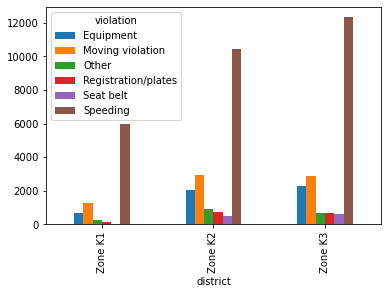

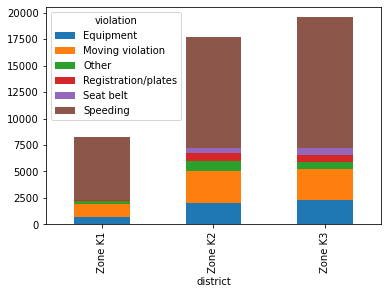

In [17]:
k_zones.plot(kind='bar')
k_zones.plot(kind='bar',stacked=True)

<div class="exercise"><b>Question 10:</b></div> 

In the markdown cell below, answer the following questions.

1. Which plot do you find to be more insightful?  Explain.
1. Comment on how the violations differ by zone.

1. I think the unstacked plot is better, because it is more clear to compare the number of violations among 3 zones by directly looking at the heights of bars.
2. Firstly, the number of violations at Zone K1 is much less than the other two zones, and the numbers of different types of violations are less than other 2 zones as well. For all 3 zones, speeding is the biggest reason of violations.  For Zone 2 and Zone 3, they have almost the same numbers of different types of violations other than speeding, meaning the situations of Zone 2 and Zone 3 are similar. Zone 3 has more speeding violationa than Zone 2.

# Date-Time Format

Currently, the date and time of each traffic stop are stored in separate object columns: `stop_date` and `stop_time`.  It will be beneficial to combine these two columns into a single column and then convert it to `datetime` format.  This will enable convenient date-based attributes.

Take a few minutes and read about the `datetime` format [here](https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/).

<div class="exercise"><b>Task 14: Combine Date and Stop Time</b></div> 

Take a few minutes and read about concatenating columns in Pandas [here](https://www.datasciencemadesimple.com/concatenate-two-columns-dataframe-pandas-python-2/) and converting a string to `datetime` formart [here](https://datascienceparichay.com/article/pandas-convert-string-column-to-datetime/).  **Do not move on until you have carefully read both articles.**

In the code cell below, write Python code to do the following.<br>

- Use `.str.cat()` to concatenate the `stop_date` and `stop_time` columns, separated by a space (`sep=' '`), and store the result (which should be a `Series`) as `combined`.
- Convert `combined` to `datetime` format (using `pd.to_datetime()`), and store the result in a new column of `traffic` named `stop_datetime`.
- Print `traffic['stop_datetime'].head()` to verify that the columns were concatenated correctly and that the `dtype` is now `datetime64`.

The output from my solution is:<br>
<code>
0   2005-01-04 12:55:00
1   2005-01-23 23:15:00
2   2005-02-17 04:15:00
3   2005-02-20 17:15:00
4   2005-02-24 01:20:00
Name: stop_datetime, dtype: datetime64[ns]
</code>

In [18]:
combined = traffic.stop_date.str.cat(traffic.stop_time, sep = ' ')
traffic['stop_datetime'] = pd.to_datetime(combined)
print(traffic['stop_datetime'].head())

0   2005-01-04 12:55:00
1   2005-01-23 23:15:00
2   2005-02-17 04:15:00
3   2005-02-20 17:15:00
4   2005-02-24 01:20:00
Name: stop_datetime, dtype: datetime64[ns]


It makes sense to set the `stop_datetime` column as the data frames `index`. By replacing the default `index` with a `DatetimeIndex`, it will make it easier to analyze the data by date and time.

In the code cell below, write Python code to do the following.<br>

- Set `stop_datetime` as the `index` of `traffic` using the `.set_index()` method--be sure to do it *in place*.
- Print `traffic.head()` to verify that `stop_datetime` is no longer a column in `traffic`.

The output from my solution is as follows:<br>

<code>
                      stop_date stop_time driver_gender driver_race  \
stop_datetime                                                         
2005-01-04 12:55:00  2005-01-04     12:55             M       White   
2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2005-02-17 04:15:00  2005-02-17     04:15             M       White   
2005-02-20 17:15:00  2005-02-20     17:15             M       White   
2005-02-24 01:20:00  2005-02-24     01:20             F       White   
</code><code>
                                      violation_raw  violation  \
stop_datetime                                                    
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   
2005-02-17 04:15:00                        Speeding   Speeding   
2005-02-20 17:15:00                Call for Service      Other   
2005-02-24 01:20:00                        Speeding   Speeding   
</code><code>
                     search_conducted search_type   stop_outcome  is_arrested  \
stop_datetime                                                                   
2005-01-04 12:55:00             False         NaN       Citation        False   
2005-01-23 23:15:00             False         NaN       Citation        False   
2005-02-17 04:15:00             False         NaN       Citation        False   
2005-02-20 17:15:00             False         NaN  Arrest Driver         True   
2005-02-24 01:20:00             False         NaN       Citation        False   
</code><code>
                    stop_duration  drugs_related_stop district  frisk  
stop_datetime                                                          
2005-01-04 12:55:00      0-15 Min               False  Zone X4  False  
2005-01-23 23:15:00      0-15 Min               False  Zone K3  False  
2005-02-17 04:15:00      0-15 Min               False  Zone X4  False  
2005-02-20 17:15:00     16-30 Min               False  Zone X1  False  
2005-02-24 01:20:00      0-15 Min               False  Zone X3  False   
</code>

In [19]:
traffic.set_index('stop_datetime', inplace=True)
print(traffic.head())

                      stop_date stop_time driver_gender driver_race  \
stop_datetime                                                         
2005-01-04 12:55:00  2005-01-04     12:55             M       White   
2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2005-02-17 04:15:00  2005-02-17     04:15             M       White   
2005-02-20 17:15:00  2005-02-20     17:15             M       White   
2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                                      violation_raw  violation  \
stop_datetime                                                    
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   
2005-02-17 04:15:00                        Speeding   Speeding   
2005-02-20 17:15:00                Call for Service      Other   
2005-02-24 01:20:00                        Speeding   Speeding   

                     search_conducted s

# Further Analysis Using Date and Time

<div class="exercise"><b>Task 15: Investigating Hourly Arrest Rate</b></div> 

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the *arrest rate*. We are interested in determining if the arrest rate varies by time of day.

In the code cell below, we do the following (**all the code has been written for you**):

- First, we calculate the arrest rate across all stops in the `traffic` data frame (using `mean()` on the `is_arrested` column). 
- Second, we calculate the hourly arrest rate by using the `hour` attribute of the `index` (which is of a `datetime` type). Specifically, group by the `hour` attribute of the data frame `index` to calculate the hourly arrest rate. Note that the hour ranges from 0 to 23, in which:<br>
        0 = midnight
        12 = noon
        23 = 11 PM
- Finally, we create a line plot from the `hourly_arrest_rate` object, which is an appropriate graphical summary in this case because we are examining how a quantity changes over time.

**Please study the code cell below carefully, being sure to understand everything, and then run it.**

The overall arrest rate is 0.0355690117407784

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


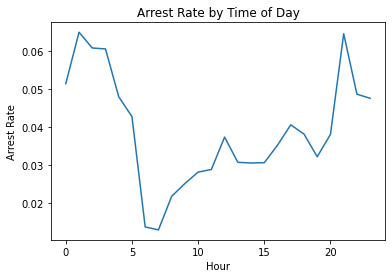

In [20]:
# Calculate and print the overall arrest rate
overallArrestRate = traffic.is_arrested.mean()
print('The overall arrest rate is ' + str(overallArrestRate) + '\n')

# Calculate and print the hourly arrest rate
hourly_arrest_rate = traffic.groupby(traffic.index.hour).is_arrested.mean()
print(hourly_arrest_rate)

# Create a line plot of 'hourly_arrest_rate'
import matplotlib.pyplot as plt
plt.plot(hourly_arrest_rate)
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

<div class="exercise"><b>Question 11:</b></div> 

In the markdown cell below, answer the following questions.

1. Does the arrest rate vary by time of day?
1. Discuss the general time of day for when arrests are least likely and most likely to occur (early morning, morning, afternoon, evening, etc).

1. Yes, the arrest rate arrest does vary by time of day, because according to the plot we made, the arrest rate is not a straight line.
2. According to the plot, it seems like that morning (6-7am) is least likely to be arrested, and both evening (9pm) and early night (1-3am) are most likely to be arrested.

# Examining Stop Durations

In the traffic stops dataset, the `stop_duration` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as `'0-15 Min'`. If we want to analyze this data we will need to convert this column into a more useful form.

<div class="exercise"><b>Task 16: Converting Stop Durations to Numbers</b></div> 

Let's convert the stop durations to integers, which will allow us to better analyze them. Because the precise durations are not available, we will have to estimate the numbers using *reasonable* values.  Specifically, we will use the following conversions:<br>

    Convert '0-15 Min' to 8
    Convert '16-30 Min' to 23
    Convert '30+ Min' to 45

That is, we will estimate that stops in the `'0-15 Min'` group lasted 8 minutes, those in the `'16-30 Min'` group took 23 minutes, and those in the `'30+ Min'` group took 45 minutes.

Take a few minutes to read over Pandas *map* feature [here](https://kanoki.org/2019/04/06/pandas-map-dictionary-values-with-dataframe-columns/), which allows you to create a new column by *mapping* the data frame column values with a *Dictionary Key*.  **Do not move on until you have read the article carefully!**

In the code cell below, do the following:

- Create a dictionary called `mapping` that maps the `stop_duration` strings to the specified integers above.
- Convert the `stop_duration` strings to integers using the mapping (by passing `mapping` into the `map()` method applied to the `stop_duration` column), and store the results in a new column called `stop_minutes`.
- Print the first 10 rows of the just the `stop_duration` and `stop_minutes` columns of `traffic` to verify that the mapping appears correct.

The output from my solution is as follows:<br>

<code>
                    stop_duration  stop_minutes
stop_datetime                                  
2005-01-04 12:55:00      0-15 Min             8
2005-01-23 23:15:00      0-15 Min             8
2005-02-17 04:15:00      0-15 Min             8
2005-02-20 17:15:00     16-30 Min            23
2005-02-24 01:20:00      0-15 Min             8
2005-03-14 10:00:00      0-15 Min             8
2005-03-29 21:55:00      0-15 Min             8
2005-04-04 21:25:00      0-15 Min             8
2005-07-14 11:20:00      0-15 Min             8
2005-07-14 19:55:00      0-15 Min             8
</code>

In [21]:
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}
traffic['stop_minutes'] = traffic['stop_duration'].map(mapping)
print(traffic[['stop_duration','stop_minutes']].head(10))

                    stop_duration  stop_minutes
stop_datetime                                  
2005-01-04 12:55:00      0-15 Min             8
2005-01-23 23:15:00      0-15 Min             8
2005-02-17 04:15:00      0-15 Min             8
2005-02-20 17:15:00     16-30 Min            23
2005-02-24 01:20:00      0-15 Min             8
2005-03-14 10:00:00      0-15 Min             8
2005-03-29 21:55:00      0-15 Min             8
2005-04-04 21:25:00      0-15 Min             8
2005-07-14 11:20:00      0-15 Min             8
2005-07-14 19:55:00      0-15 Min             8


<div class="exercise"><b>Task 17: Plotting Stop Lengths</b></div> 

If you were stopped for a particular violation, how long might you expect to be detained?

Rather than using the `violation` column, let's use the `violation_raw` column since it contains more detailed descriptions of the violations.

In the code cell below, do the following:

- For each value in the `traffic` data frames `violation_raw` column, calculate the mean number of `stop_minutes` that a driver is detained.  To accomplish this, you'll need to *group by* `violation_raw` and compute the mean of `stop_minutes`.  Save the resulting object as `stop_length`.
- Print `stop_length`.
- Sort `stop_length` by its values, and then visualize it with a horizontal bar plot, using the `.plot(kind='barh')` method of the object (similar to Task 13).

Here is my output:

![bargraph2](graph2.png)

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


<AxesSubplot:ylabel='violation_raw'>

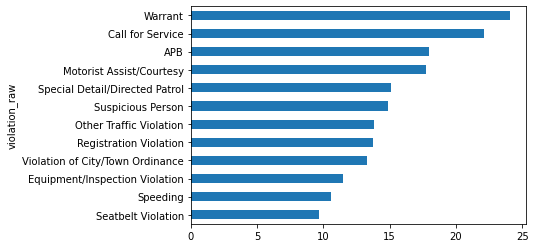

In [22]:
stop_length = traffic['stop_minutes'].groupby(traffic.violation_raw).mean()
print(stop_length)
stop_length = stop_length.sort_values()
stop_length.plot(kind='barh')

<div class="exercise"><b>Question 12:</b></div> 

In the markdown cell below, discuss how the stop duration varies by violation.

Warrant and Call for Service are the two violations having longest stop durations which around 23 minutes. Next are APB  and Motorist Assist/Courtesy with stop duration around 18 minutes. Most of stop durations of the other kinds of violations are less than 15 minutes.

# The Effect of Temperature

We now wish to assess the effect of weather on the arrest rate. For the remainder of this project we will be working with a new data set to help us determine if weather conditions have an impact on police behavior.  The weather data we will be using was collected by the [National Centers for Environmental Information](https://www.ncei.noaa.gov/). 

We are interested in determining if weather conditions impact police behavior during traffic stops.  Ideally, we would look up the historical weather at the location of each stop. However, the traffic stops data set does not specify stop location, so we're going to use the data from a single weather station near the center of Rhode Island. This is not ideal, but Rhode Island is the smallest US state and so a single station will still give us a *general idea* of the weather throughout the state.

<div class="exercise"><b>Task 18: Importing and Exploring Weather Data</b></div> 

The `weather.csv` file in the folder `project1Data` contains the weather data from Rhode Island that we will use in this project.

In the code cell below, write Python code to do the following.<br>

1. Read in the file `weather.csv` and assign it to the data frame `weather`.
1. Print the first 5 rows of the data frame and familiarize yourself with the columns.

The output from my solution is as follows:<br>

<code>
       STATION        DATE  TAVG  TMIN  TMAX  AWND  WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01  44.0    35    53  8.95  25.1   1.0   NaN   NaN   
1  USW00014765  2005-01-02  36.0    28    44  9.40  14.1   NaN   NaN   NaN   
2  USW00014765  2005-01-03  49.0    44    53  6.93  17.0   1.0   NaN   NaN   
3  USW00014765  2005-01-04  42.0    39    45  6.93  16.1   1.0   NaN   NaN   
4  USW00014765  2005-01-05  36.0    28    43  7.83  17.0   1.0   NaN   NaN   
</code><code>
   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
2  ...   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
3  ...   NaN   1.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
4  ...   NaN   1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
</code><code>
[5 rows x 27 columns]
</code>

In [23]:
weather = pd.read_csv("project1Data\\weather.csv")
weather.head(5)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


**The Weather Data Set:** You can see that the `STATION` column lists the station ID, and there's one row for each date. There are three columns related to temperature (`TAVG`, `TMIN`, `TMAX`) that correspond to the average temperature, the minimum temperature, and the maximum temperature for that day.  The are two columns (`AWND` and `WSF2`) related to wind speed, and the last 20 columns are related to the presence of certain bad weather conditions.  For example:

    WT05 indicates "Hail"
    WT11 indicates "High or damaging winds"
    WT17 indicates "Freezing rain"
    
For every row in the dataset, each `WT` column contains either a 1 (meaning the condition was present that day) or `NaN` (meaning the condition was not present).

Note that the temperature is measured in degrees Fahrenheit, not Celsius!

<div class="exercise"><b>Task 19: Categorizing Weather Days</b></div> 

Let's try to quantify how "bad" the weather was each day by counting the number of 1 values in each row.

In the code cell below, write Python code to do the following.<br>

- Copy the columns `WT01` through `WT22` from `weather` using `.loc[]` to a new data frame named `WT`.
- Calculate the sum of each row in `W`, and store the results in a new column of `weather` named `bad_conditions`.  You will want to use the `.sum(axis='columns')` method.
- Replace any missing values in `bad_conditions` with a 0. (This has been done for you.)
- Create a histogram to visualize `bad_conditions`, and then display the plot. (This has been done for you.)

Here is my output:

![bargraph3](graph3.png)

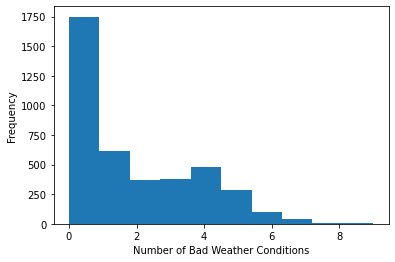

In [24]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,['WT01','WT02','WT03','WT04','WT05','WT06','WT07','WT08','WT09','WT10','WT11','WT13','WT14','WT15','WT16','WT17','WT18','WT19','WT21','WT22']]

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')
plt.xlabel('Number of Bad Weather Conditions')

# Display the plot
plt.show()

<div class="exercise"><b>Question 13:</b></div> 

Note that we are counting bad weather events, so days with higher numbers of events should be considered *bad* weather days.  In the markdown cell below, discuss the distribution of bad weather days.

The distribution of bad weather days is strongly right skew. We can see that for most of days, there was no bad weather conditions in a day.

<div class="exercise"><b>Task 20: Rating Weather Days</b></div> 

In the previous task we counted the number of bad weather conditions each day. We are now interested in using the counts to create a *rating system* for the weather.

Recall that the number of bad weather conditions ranged from 0 to 9 in the `bad_conditions` column.  Let's create a new (categorical) column called `rating`, where we convert the bad weather counts in the `bad_conditions` column according to the following:

    Convert 0 to 'good'
    Convert 1 through 4 to 'bad'
    Convert 5 through 9 to 'worse'

In the code cell below, write Python code to do the following.<br>

- Create a dictionary called `mapping` that maps the `bad_conditions` integers to the specified strings (this has been done for you).
- Convert the `bad_conditions` integers to strings using the mapping (by passing `mapping` into the `map()` method applied to the `bad_conditions` column, and store the results in a new column called `rating`.
- Count the unique values in `rating` (this has been done for you).

The output from my solution is as follows:<br>

<code>
bad      1836
good     1749
worse     432
Name: rating, dtype: int64
</code>

In [25]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 
           6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather['bad_conditions'].map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


**Changing the Data Type to Category** Note that we created the `rating` column to represent a categorical variable for rating the weather.  Let's change its data type to `category` in order to store the data more efficiently. We can also specify a *logical order* for the categories, which we will find useful shortly.

Take a few minutes and read about Pandas *categorical* data type [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

In the code cell below, we do the following (**the code has been written for you):

- First, we create a list object called `cats` that lists the weather ratings in a logical order: `'good'`, `'bad'`, `'worse'`.
- Second, we change the data type of the `rating` column from object to `category`, making sure to use the `cats` list to define the category ordering.
- Finally, we examine the last ten rows of the `bad_conditions` and `rating` columns to confirm that the categories are logically ordered.

**Please study the code cell below carefully, being sure that understand it, and then run it.**

In [26]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = pd.Categorical(weather['rating'], categories=cats, ordered=True)

# Examine the head of 'rating'
print(weather[['bad_conditions','rating']].tail(10))

      bad_conditions rating
4007               1    bad
4008               2    bad
4009               2    bad
4010               2    bad
4011               0   good
4012               1    bad
4013               0   good
4014               3    bad
4015               2    bad
4016               1    bad


<div class="exercise"><b>Task 21: Preparing to Merge the Data Frames</b></div> 

Before we can determine if weather conditions have an impact on police behavior, we need to merge our `traffic` and `weather` data frames.  In this task we will prepare the data frames to be merged.

In the code cell below, do the following:

- Move the `stop_datetime` index of `traffic` to a column.  We do this because the index will be lost during the merge, and this will allow us to preserve it (this has been done for you).
- Create a new data frame called `weather_rating` that contains just the `DATE` and `rating` columns of `weather`.
- Print the head of the new `weather_rating` data frame.

The output from my solution is as follows:<br>

<code>
         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad
</code>

In [27]:
# Reset the index of 'traffic'
traffic.reset_index(inplace=True)

# Create a DataFrame called 'weather_rating' from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


<div class="exercise"><b>Task 22: Merging the Data Frames</b></div> 

We are now ready to merge the `traffic` and `weather_rating` data frames. The data frames will be joined using the `stop_date` column from `traffic` and the `DATE` column from `weather_rating`. Thankfully, the date formatting matches exactly, which is not always the case!

Take a few minutes and read the following article [here](https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/).  In particular, you should read about using `left_on` and `right_on` to merge data frames with *different column names*, which is not something we covered in the notes.**Be sure to read this article before moving on!**

In the code cell below, do the following:

- Merge the `traffic` and `weather_rating` data frames with left join, using the `stop_date` column from `traffic` and the `DATE` column from `weather_rating`.  Since the column names do not match, you will need to use the `left_on` and `right_on` parameters (see article above).  Name the new data frame `traffic_weather`. 
- Replace the index of `traffic_weather` with the `stop_datetime` column (this has been done for you).
- Print the first 5 rows of the just the `stop_date`,`DATE`, and `rating` columns of `traffic_weather`.  Then verify that the dates of the merged dataframes appear to line up correctly and that `stop_datetime` is now the index.
- Print the shape of `traffic_weather` to verify the size.

The output from my solution is as follows--make sure your output is similar:<br>

<code>
                      stop_date        DATE rating
stop_datetime                                     
2005-01-04 12:55:00  2005-01-04  2005-01-04    bad
2005-01-23 23:15:00  2005-01-23  2005-01-23  worse
2005-02-17 04:15:00  2005-02-17  2005-02-17   good
2005-02-20 17:15:00  2005-02-20  2005-02-20    bad
2005-02-24 01:20:00  2005-02-24  2005-02-24    bad

The shape of the data frame is (86536, 17)
</code>

In [28]:
# Merge 'traffic' and 'weather_rating' using a left join
traffic_weather = pd.merge(traffic,weather_rating,left_on='stop_date',right_on='DATE',how='left')

# Set 'stop_datetime' as the index of 'traffic_weather'
traffic_weather.set_index('stop_datetime', inplace=True)

# Print the head of 'traffic_weather'
print(traffic_weather[['stop_date','DATE','rating']].head(5))

# Examine the shape of 'ri_weather'
print(traffic_weather.shape)

                      stop_date        DATE rating
stop_datetime                                     
2005-01-04 12:55:00  2005-01-04  2005-01-04    bad
2005-01-23 23:15:00  2005-01-23  2005-01-23  worse
2005-02-17 04:15:00  2005-02-17  2005-02-17   good
2005-02-20 17:15:00  2005-02-20  2005-02-20    bad
2005-02-24 01:20:00  2005-02-24  2005-02-24    bad
(86536, 17)


<div class="exercise"><b>Task 23: Comparing Arrest Rates by Weather Rating</b></div> 

We are finally ready to examine if police officers arrest drivers more often when the weather is bad.

In the code cell below, we compute the arrest rate for each combination of violation and weather rating.  This is accomplished with a *group by* operation using both `violation` and `rating` as factors and computing the mean of the `is_arrested` column.

**Please study the code cell below carefully, being sure to understand the code, and then run it.**

In [29]:
# Save the output of the groupby operation from the last exercise
arrest_rate = traffic_weather.groupby(['violation', 'rating']).is_arrested.mean()
print(arrest_rate)

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


<div class="exercise"><b>Task 24: Reshaping the Arrest Data</b></div> 

First, note that since we previously defined a logical order for the weather categories, `good < bad < worse`, our results were sorted in that way.

Second, note that the output of the single `.groupby()` operation on multiple columns is a `Series` with a `MultiIndex`.  Specifically, the `arrest_rate` object from the last task is a `MultiIndex` `Series`.

Let's *reshape* `arrest_rate` into a data frame.  This is a useful step when working with any multi-indexed `Series`, since it enables you to access the full range of data frame methods.

Take a few minutes to read about stacking and unstacking data frames [here](https://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/).  **Do not move on until you have carefully read the article**.

In the code cell below, do the following:

- Create a new data frame called `arrest_rate_df` by using the `unstack()` method of the `arrest_rate` .
- Print `arrest_rate_df`.

The output from my solution is as follows<br>

<code>
rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
</code>

In [30]:
arrest_rate_df = arrest_rate.unstack()
print(arrest_rate_df)

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


<div class="exercise"><b>Question 14:</b></div> 

In the markdown cell below, answer the following questions.

1. Do the arrest rates for the various violations appear to depend on the weather conditions?  
1. In particular, does the arrest rate increase as the weather gets worse?  Explain. 
1. Try to speculate as to why we see this trend.

1. Yes. I think the arrest rates for the various violations sometimes depend on the weather conditions.
2. The arrest rate of euipment, moving, registration/plates, and speeding violations increase as the weather gets worse, since the rating in worse weathers larger than that in bad weathers and good weathers.
3. Because as the weather geting worse, it is more difficult to drive, which means it is more possible to violate.